<a href="https://colab.research.google.com/github/HananeIouiri/Digital-Banking-App-Backend/blob/main/Recipe_AI_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
%matplotlib inline

# 1. Dataset


In [ ]:
df1=pd.read_csv('recipes.csv')


In [ ]:
print(df1.shape)
print(df1.head())


(83782, 12)
                                   name      id  minutes  contributor_id  \
0  1 brownies in the world    best ever  333281       40          985201   
1    1 in canada chocolate chip cookies  453467       45         1848091   
2                412 broccoli casserole  306168       40           50969   
3                millionaire pound cake  286009      120          461724   
4                         2000 meatloaf  475785       90         2202916   

    submitted                                               tags  \
0  2008-10-27  ['60-minutes-or-less', 'time-to-make', 'course...   
1  2011-04-11  ['60-minutes-or-less', 'time-to-make', 'cuisin...   
2  2008-05-30  ['60-minutes-or-less', 'time-to-make', 'course...   
3  2008-02-12  ['time-to-make', 'course', 'cuisine', 'prepara...   
4  2012-03-06  ['time-to-make', 'course', 'main-ingredient', ...   

                                       nutrition  n_steps  \
0       [138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]       10   


In [ ]:
# Parse nutrition field into separate columns
df1[['calories','fat','sugar','sodium','protein','sat_fat','carbs']] = (
    df1['nutrition'].str.strip('[]').str.split(',', expand=True).astype(float)
)
df1.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,fat,sugar,sodium,protein,sat_fat,carbs
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9,138.4,10.0,50.0,3.0,3.0,19.0,6.0
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11,595.1,46.0,211.0,22.0,13.0,51.0,26.0
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9,194.8,20.0,6.0,32.0,22.0,36.0,3.0
3,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7,878.3,63.0,326.0,13.0,20.0,123.0,39.0
4,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13,267.0,30.0,12.0,12.0,29.0,48.0,2.0


In [ ]:
# Features & Target
x = df1[['fat','protein','carbs']]
y = df1['calories']

In [ ]:
x.shape
y.shape
y=df1.calories.values.reshape(-1,1)

In [ ]:
#Notes:

#Sugar is a type of carb, so you don’t add it separately if you already have total carbs.

#Sodium contributes 0 calories.~

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# 5. Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
X_train=np.hstack((np.ones((x_train.shape[0], 1)),x_train_scaled))
X_test=np.hstack((np.ones((x_test.shape[0], 1)),x_test_scaled))
X_train
X_test

array([[ 1.        , -0.29015547, -0.27177982, -0.13055806],
       [ 1.        , -0.0947717 ,  0.60530139, -0.26630339],
       [ 1.        , -0.43669331,  0.41463156, -0.26630339],
       ...,
       [ 1.        , -0.25759151, -0.6340525 , -0.4699214 ],
       [ 1.        ,  0.24714991,  0.10955984, -0.02874905],
       [ 1.        ,  0.63791746,  0.31929665,  0.27667796]])

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(67025, 4)
(16757, 4)
(16757, 1)
(67025, 1)


## 2. Linear Model


In [ ]:
def model(X,theta):
  return X.dot(theta)

In [ ]:
np.random.seed(0)
theta=np.random.randn(4).reshape(-1,1)
print('Theta',theta)

Theta [[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]]


# 3. Cost Function

In [ ]:
def cost_function(X,y,theta):
  m=len(y)
  return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [ ]:
cost_function(X_train,y_train,theta)

np.float64(300251.97828025196)

#4 .Gradient Descent

In [ ]:
def grad(X,y,theta):
  m=len(y)
  return 1/m*X.T.dot(model(X,theta)-y)

In [ ]:
def gradient_descent(X, Y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, Y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, Y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]

    return theta, cost_history

# 5. Training Model

In [ ]:
n_iterations=100000
learning_rate=0.001

In [ ]:
theta_final,cost_history=gradient_descent(X_train,y_train,theta,learning_rate,n_iterations)

In [ ]:
theta_final,cost_history

(array([[432.04347035],
        [351.21074162],
        [113.13665821],
        [341.98934016]]),
 array([299342.48300408, 298435.96030671, 297532.40001784, ...,
          1171.99810633,   1171.99810633,   1171.99810633]))

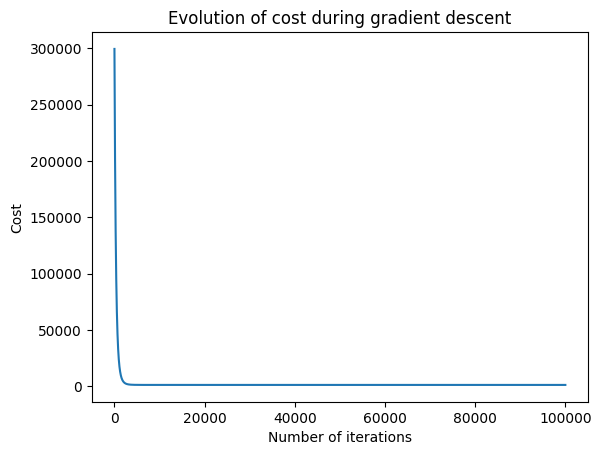

In [ ]:
# Learning curve
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Evolution of cost during gradient descent")
plt.show()

#6. Predictions

In [ ]:
y_pred=model(X_test,theta_final)
y_pred

array([[254.7400273 ],
       [376.16748643],
       [234.50919787],
       ...,
       [109.13187307],
       [521.40853822],
       [786.83200474]])

# 7. Evaluation

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
coef_determination(y_test,y_pred)

np.float64(0.9945901918586794)